In [1]:
import cv2
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import Parameters
import Dependency as Dependency

# Hospitalization, ICU, and CFR computation

In [2]:
def augment_ontario_public_health(lst):
    augment = np.zeros(shape=(100,))
    augment[0:12] = np.array([lst[0]] * 12)
    augment[12:20] = np.array([lst[1]] * 8)
    augment[20:30] = np.array([lst[2]] * 10)
    augment[30:40] = np.array([lst[3]] * 10)
    augment[40:50] = np.array([lst[4]] * 10)
    augment[50:60] = np.array([lst[5]] * 10)
    augment[60:70] = np.array([lst[6]] * 10)
    augment[70:80] = np.array([lst[7]] * 10)
    augment[80:] = np.array([lst[8]] * 20)
    return augment

In [3]:
def stratification(raw=np.zeros(shape=(100, ))):
    age_stratification = np.zeros(shape=(16, ))
    for i in range(15):
        age_stratification[i] = np.sum(raw[5*i:5 * (i+1)]) / 5
    age_stratification[15] = np.sum(raw[74:]) / 25
    return age_stratification

In [4]:
d = Dependency.Dependency()
cases_read_path = d.get_dependency_path() + 'Canada_hospitalization_inference.csv'
df = pd.read_csv(cases_read_path)
print(df)
cases = np.array(list(df.cases))
hospitalization = np.array(list(df.hospitalization))
icu = np.array(list(df.ICU))
deaths = np.array(list(df.death))

  age_band   cases  hospitalization   ICU  death
0     0-11  414244             5424   508     41
1    12-19  330566             2350   244     25
2    20-29  745073             8634   933    144
3    30-39  711355            12999  1774    335
4    40-49  621005            14094  2914    720
5    50-59  524031            22161  5434   2061
6    60-69  333394            31466  7567   4889
7    70-79  210111            39557  6948   9875
8      80+  272388            57001  3522  27939


In [5]:
cases_augment = augment_ontario_public_health(cases)
hospitalized_augment = augment_ontario_public_health(hospitalization)
icu_augment = augment_ontario_public_health(icu)
deaths_augment = augment_ontario_public_health(deaths)

In [6]:
cases_augment = np.reshape(np.array(cv2.GaussianBlur(cases_augment.reshape(100, 1), (25, 25), 0)), newshape=(100,))
hospitalized_augment = np.reshape(np.array(cv2.GaussianBlur(hospitalized_augment.reshape(100, 1), (25, 25), 0)), newshape=(100,))
icu_augment = np.reshape(np.array(cv2.GaussianBlur(icu_augment.reshape(100, 1), (25, 25), 0)), newshape=(100,))
deaths_augment = np.reshape(np.array(cv2.GaussianBlur(deaths_augment.reshape(100, 1), (25, 25), 0)), newshape=(100,))

In [7]:
hosp_ratio = hospitalized_augment / cases_augment
icu_ratio = icu_augment / cases_augment
cfr = deaths_augment / cases_augment

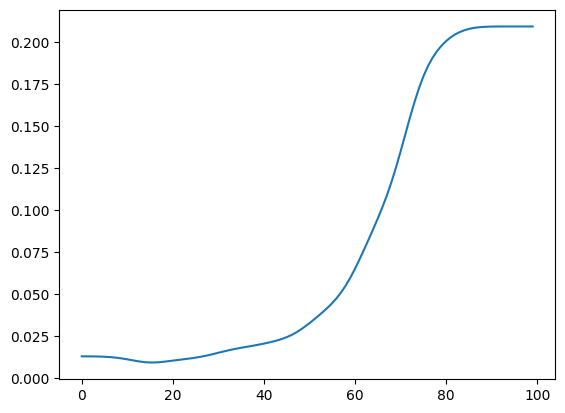

In [8]:
plt.plot(list(range(0, 100)), hosp_ratio)
plt.show()

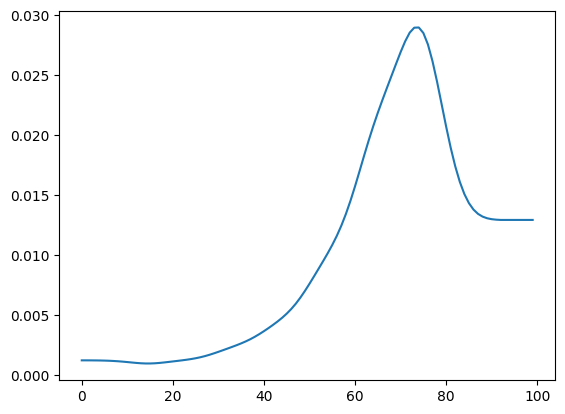

In [9]:
plt.plot(list(range(0, 100)), icu_ratio)
plt.show()

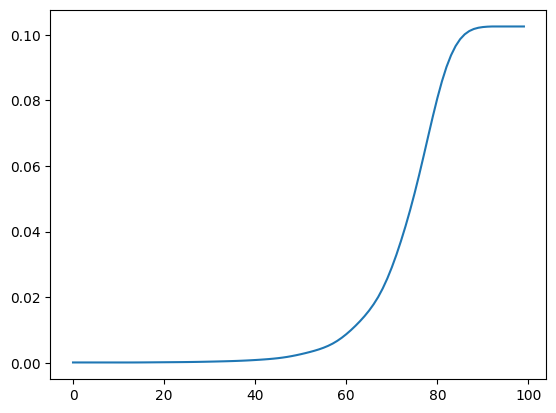

In [10]:
plt.plot(list(range(0, 100)), cfr)
plt.show()

In [11]:
case_stratified = stratification(raw=cases_augment)
hosp_stratified = stratification(raw=hosp_ratio)
icu_stratified = stratification(raw=icu_ratio)
cfr_stratified = stratification(raw=cfr)

C:\Users\loveb\AppData\Local\Temp\ipykernel_34156\2942000957.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1), plt.bar(range(0, 16), hosp_stratified)


(<AxesSubplot: >, <BarContainer object of 16 artists>)

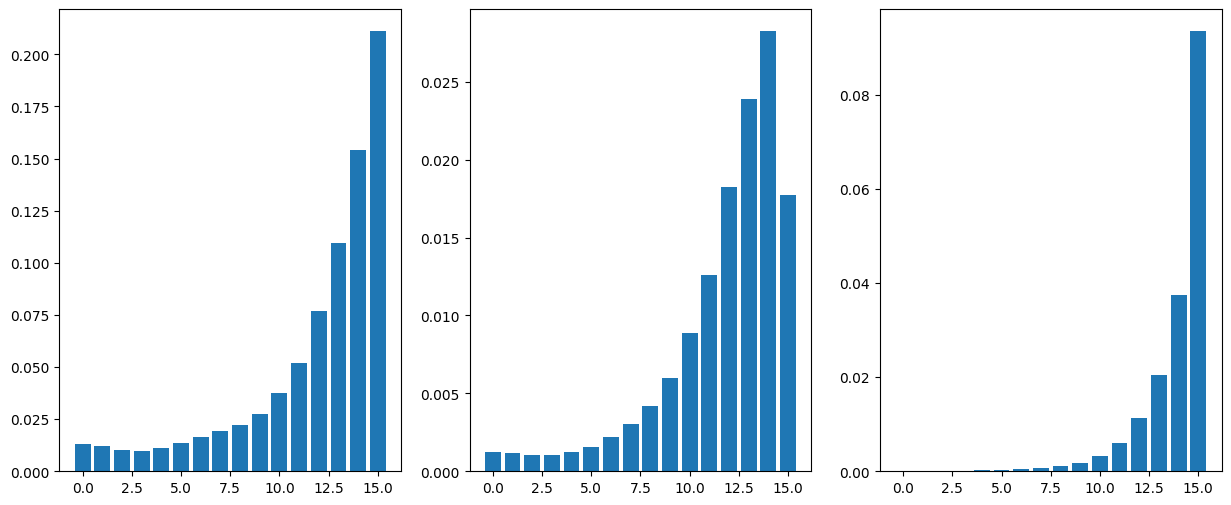

In [12]:
plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1,3,1), plt.bar(range(0, 16), hosp_stratified)
plt.subplot(1,3,2), plt.bar(range(0, 16), icu_stratified)
plt.subplot(1,3,3), plt.bar(range(0, 16), cfr_stratified)

In [13]:
print(case_stratified / np.sum(case_stratified))
print(hosp_stratified)
print(icu_stratified)
print(cfr_stratified)

[0.05249542 0.05111049 0.04896265 0.05790512 0.07973513 0.09132002
 0.09107228 0.0873147  0.08164537 0.07587614 0.06908633 0.06024627
 0.04856209 0.03894042 0.03145489 0.03427269]
[0.01303065 0.01235898 0.01038077 0.0097061  0.01121739 0.01336316
 0.01648061 0.01913183 0.0219753  0.02739945 0.0373693  0.05187129
 0.07685526 0.10960614 0.15406819 0.21108015]
[0.00122118 0.00116669 0.00101664 0.00101756 0.0012296  0.00158911
 0.0022096  0.00300761 0.00420072 0.00601005 0.00887262 0.01257768
 0.01827112 0.023918   0.02824015 0.01775055]
[9.87293737e-05 9.63117654e-05 9.62190186e-05 1.30947921e-04
 1.87404371e-04 2.68738282e-04 4.14312243e-04 6.37480832e-04
 1.03892535e-03 1.82436340e-03 3.32161024e-03 5.97837815e-03
 1.13594029e-02 2.04377866e-02 3.74666196e-02 9.35947229e-02]


In [14]:
susceptibility_raw = np.zeros(shape=(100, ))

susceptibility_raw[0:10] = 0.4
susceptibility_raw[10:20] = 0.38
susceptibility_raw[20:30] = 0.79
susceptibility_raw[30:40] = 0.86
susceptibility_raw[40:50] = 0.8
susceptibility_raw[50:60] = 0.82
susceptibility_raw[60:70] = 0.88
susceptibility_raw[70:100] = 0.74

susceptibility = np.reshape(np.array(cv2.GaussianBlur(susceptibility_raw.reshape(100, 1), (25, 25), 0)),
                            newshape=(100,))

susceptibility_stratified = stratification(raw=susceptibility)

In [15]:
clinical_raw = np.zeros(shape=(100, ))

clinical_raw[0:10] = 0.29
clinical_raw[10:20] = 0.21
clinical_raw[30:40] = 0.33
clinical_raw[40:50] = 0.4
clinical_raw[50:60] = 0.49
clinical_raw[60:70] = 0.63
clinical_raw[70:100] = 0.69

clinical = np.reshape(np.array(cv2.GaussianBlur(clinical_raw.reshape(100, 1), (25, 25), 0)),
                            newshape=(100,))

clinical_stratified = stratification(raw=clinical)

C:\Users\loveb\AppData\Local\Temp\ipykernel_34156\991191349.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1), plt.bar(range(0, 16), susceptibility_stratified)


(<AxesSubplot: >, <BarContainer object of 16 artists>)

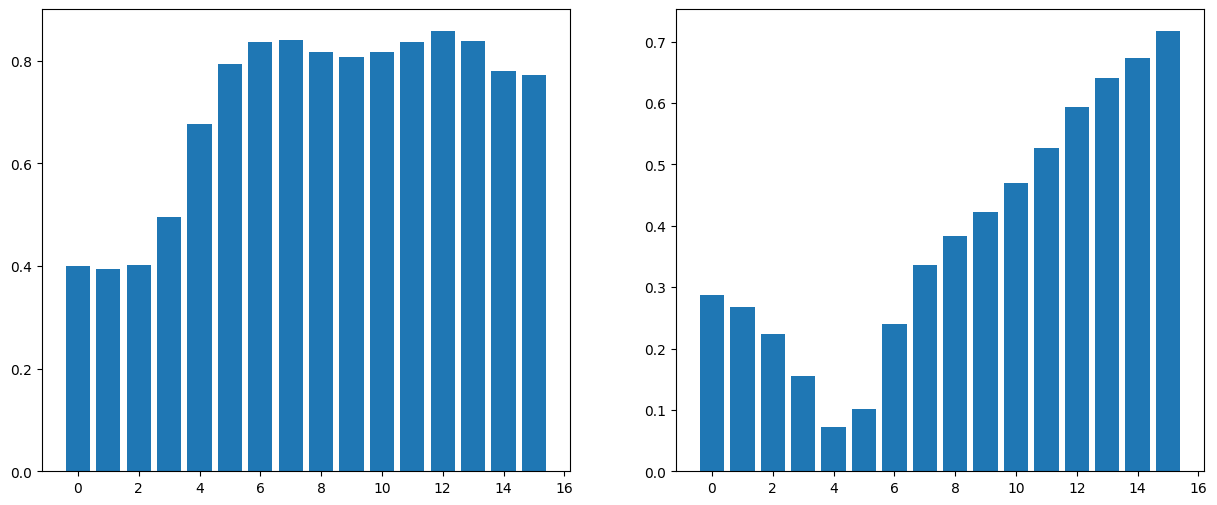

In [16]:
plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1,2,1), plt.bar(range(0, 16), susceptibility_stratified)
plt.subplot(1,2,2), plt.bar(range(0, 16), clinical_stratified)

In [17]:
print(susceptibility_stratified)
print(clinical_stratified)

[0.39913273 0.39480753 0.40223409 0.49633826 0.67740259 0.79304503
 0.83741945 0.84029129 0.81763046 0.80812577 0.81686202 0.83593571
 0.8574139  0.8381473  0.7793588  0.77151861]
[0.2865309  0.26724745 0.22402391 0.15445847 0.07258315 0.10150448
 0.2401337  0.33644525 0.38357917 0.42265894 0.47025061 0.52584302
 0.59291004 0.64122657 0.67295434 0.71677774]
